In [213]:
import requests
import bs4
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import scipy
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('wordnet') 
nltk.download('stopwords')
nltk.download('omw-1.4')
lemmatizer=nltk.stem.WordNetLemmatizer() 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vera\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
def tokenize_text(text):
    
    temp_tokenizedtext = nltk.word_tokenize(text)    
    mycrawled_nltktext = nltk.Text(temp_tokenizedtext)    
        
    return mycrawled_nltktext


def lower_case_text(text):
    mycrawled_lowercasetext = [] 

    for k in range(len(text)):        
        lowercaseword = text[k].lower()        
        mycrawled_lowercasetext.append(lowercaseword)    
    
    return mycrawled_lowercasetext

def tagtowordnet(postag):   
    wordnettag = -1   
    if postag[0] == 'N':        
        wordnettag = 'n'   
    elif postag[0] == 'V':        
        wordnettag = 'v'   
    elif postag[0] == 'J':        
        wordnettag = 'a'    
    elif postag[0] == 'R':        
        wordnettag = 'r'    
    return(wordnettag)

def lemmatizetext(nltktexttolemmatize):    
    # Tag the text with POS tags    
    taggedtext = nltk.pos_tag(nltktexttolemmatize)   
    # Lemmatize each word text    
    lemmatizedtext = []    
    for l in range(len(taggedtext)):       
        # Lemmatize a word using the WordNet converted POS tag       
        wordtolemmatize = taggedtext[l][0]        
        wordnettag = tagtowordnet(taggedtext[l][1])        
        if wordnettag != -1:            
            lemmatizedword = lemmatizer.lemmatize(wordtolemmatize,wordnettag)        
        else:            
            lemmatizedword=wordtolemmatize       
            # Store the lemmatized word        
        lemmatizedtext.append(lemmatizedword)
        
    return(lemmatizedtext) 


def make_vocabulary(text):
    myvocabulary = [] 
    myindices_in_vocabulary = []
    # Find the vocabulary of each document    
    # Get unique words and where they occur      
    uniqueresults = np.unique(text,return_inverse=True)   
     # Store the vocabulary and indices
    myvocabulary = uniqueresults[0]    
    myindices_in_vocabulary = uniqueresults[1]    
    
    return myvocabulary, myindices_in_vocabulary


In [3]:
def count_occur(vocab, indices):
    occurrencecounts = np.zeros((len(vocab),1)) 
    unifiedvocabulary_meancounts = np.zeros((len(vocab),1)) 
    unifiedvocabulary_countvariances = np.zeros((len(vocab),1))
    
    for l in range(len(indices)):    
        occurrencecounts[indices[l]] = \
                                        occurrencecounts[indices[l]] + 1
    
    return occurrencecounts
    

In [4]:
# getting the html content of the "Pride and Prejudice"
pride_prejudice_html = requests.get('https://www.gutenberg.org/files/1342/1342-0.txt')

# getting the text from html content of the "Pride and Prejudice"
pride_prejudice_text = bs4.BeautifulSoup(pride_prejudice_html.content,'html.parser')

# delete /n and /r from the text of the "Pride and Prejudice"
pride_prejudice_text = ' '.join(str(pride_prejudice_text).split())

# tokenize a text of the "Pride and Prejudice"
tokenized_pride_prejudice = tokenize_text(pride_prejudice_text)

# make all words lowered case in the tokenized text of the "Pride and Prejudice"
lower_cased_tokenized_pride_prejudice = lower_case_text(tokenized_pride_prejudice)

# create the lemmatized text from the lowered cased and tokenized text of the "Pride and Prejudice"
lemmatized_pride_prejudice = nltk.Text(lemmatizetext(lower_cased_tokenized_pride_prejudice))

# create the vocabulary and its list of indices from the lemmatized text of the "Pride and Prejudice"
pride_prejudice_vocabulary, indices_pride_prejudice_vocabulary = make_vocabulary(lemmatized_pride_prejudice)

In [7]:
occur_pride_prejudice = count_occur(pride_prejudice_vocabulary, indices_pride_prejudice_vocabulary)

In [8]:
highest_occurrences_indices_pride_prejudice = np.argsort(\
                                                       -1*occur_pride_prejudice,axis=0) 

top_100_pride_prejudice = np.squeeze(pride_prejudice_vocabulary[\
                                                              highest_occurrences_indices_pride_prejudice[:100]])
print(top_100_pride_prejudice)

[',' 'be' 'the' 'to' '.' 'of' 'and' 'have' 'her' 'i' 'a' 'in' '“' '”'
 'she' ';' 'not' 'that' 'it' 'you' 'he' 'his' 'as' 'with' 'for' 'but' 'do'
 'at' 'mr.' 'on' 'him' '’' 'my' 'by' 's' 'elizabeth' 'all' 'say' 'they'
 'so' 'which' 'could' 'from' '!' 'no' 'very' 'this' 'what' 'would' '?'
 'your' 'their' 'them' 'will' 'darcy' 'me' 'such' 'know' 'or' 'when' 'if'
 'an' 'there' 'mrs.' 'can' 'make' 'bennet' 'think' 'much' 'more' 'must'
 'any' 'bingley' 'see' 'jane' 'who' 'sister' 'miss' 'than' 'go' 'one'
 'give' 'lady' 'come' 'we' 'should' 'well' 'how' 'good' 'before' 'other'
 'herself' 'though' 'time' 'never' 'only' 'soon' 'some' 'may' 'after']


3.1 (b) lexical dispersion plots 

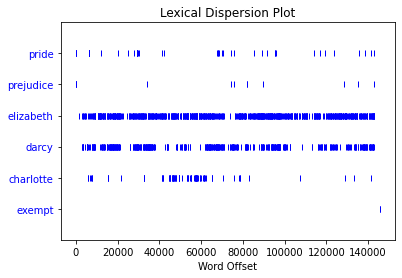

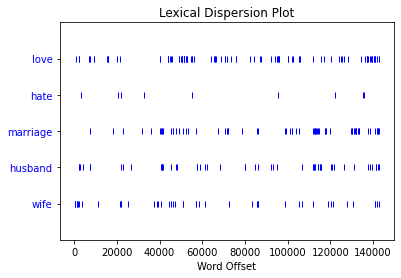

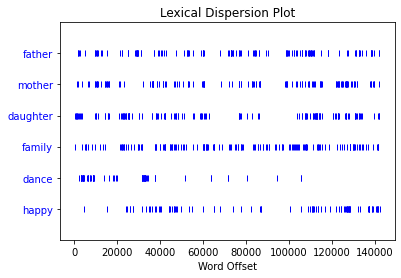

In [9]:
group_1 = ['pride', 'prejudice', 'elizabeth', 'darcy', 'charlotte','exempt']
group_2 = ['love', 'hate', 'marriage', 'husband', 'wife']
group_3 = ['father', 'mother', 'daughter', 'family', 'dance', 'happy']
groups = [group_1, group_2, group_3]

for group in groups:
    plot = lemmatized_pride_prejudice.dispersion_plot(group)

Firstly, I paid attention to lexical dispersion of names of characters (Elizabeth, Darcy and Charlotte). With this information about names we can understand who is main characters (Elizabeth, Darcy) and who is the minor characters (Charlotte). In my opinion, high level of lexical dispersion of word "love", "marriage", "husband", "wife" through all book reflects the romantic (romance, melodrama) genre of the book. Also there is high level of lexical dispersion of words "father", "mother", "daughter", "family" from which it follows that events occur between characters who are connected by family ties. 

# 3.2

In [10]:
# getting the html content of the "Frankenstein"
frankenstein_html = requests.get('https://www.gutenberg.org/files/84/84-0.txt')

# getting the text from the html content of the "Frankenstein"
frankenstein_text = bs4.BeautifulSoup(frankenstein_html.content,'html.parser')

# delete /n and /r from text of the "Frankenstein"
frankenstein_text = ' '.join(str(frankenstein_text).split())

# tokenize the text of the "Frankenstein"
tokenized_frankenstein = tokenize_text(frankenstein_text)

# make all words lowered case in the tokenized text of the "Frankenstein"
lower_cased_tokenized_frankenstein = lower_case_text(tokenized_frankenstein)

# create the lemmatized text from the lowered case and tokenized text of the "Frankenstein"
lemmatized_frankenstein = nltk.Text(lemmatizetext(lower_cased_tokenized_frankenstein))

# create a vocabulary and its list of indices from the lemmatized text of the "Frankenstein"
frankenstein_vocabulary, indices_pride_frankenstein = make_vocabulary(lemmatized_frankenstein)

# count occurance of the every word
occur_frankenstein = count_occur(frankenstein_vocabulary, indices_pride_frankenstein)

# sort indexces by the number of occurances
highest_occurrences_indices_frankenstein = np.argsort(\
                                                       -1*occur_frankenstein,axis=0) 

# get top 100 words from the most common (top 100) indices
top_100_frankenstein = np.squeeze(frankenstein_vocabulary[\
                                                              highest_occurrences_indices_frankenstein[:100]])
print(top_100_frankenstein)

[',' 'the' 'and' 'i' '.' 'of' 'be' 'to' 'my' 'a' 'in' 'have' 'that' ';'
 'me' 'with' 'but' 'you' 'he' 'not' 'which' 'it' 'as' 'his' 'for' 'by' '“'
 'on' 'this' 'from' 'her' 'at' 'when' '”' 'do' 'your' 'or' 'she' '!' '?'
 'him' 'if' 'an' 'all' 'so' 'they' 'one' 'will' 'could' 'their' 'we'
 'would' 'no' 'who' 'more' 'these' 'should' 'now' 'can' 'yet' 'before'
 'some' '’' 'man' 'myself' 'day' 'father' 'what' 'our' 'say' 'upon' 'them'
 'its' 'work' 'only' 'into' 'eye' 'find' 'friend' 'any' 'life' 'make'
 'may' 'than' 'then' 'own' 'every' 'might' 'first' 'time' 'shall' 'great'
 'take' 'feeling' 'become' 'even' 'know' 'how' 'return' 'towards']


In [11]:
group_concordance = ['science', 'horror', 'monster', 'fear']

for word in group_concordance:
    print("Concordance for: ", word)
    print(lemmatized_frankenstein.concordance(word))
    print()
    print()

Concordance for:  science
Displaying 25 of 29 matches:
cine , and those branch of physical science from which a naval adventurer might
ch lead to my predilection for that science . when i be thirteen year of age we
explode and that a modern system of science have be introduce which possess muc
in the great disdain for a would-be science which could never even step within 
e branch of study appertain to that science as be build upon secure foundation 
t deeply imbue in the secret of his science . he ask me several question concer
progress in the different branch of science appertain to natural philosophy . i
 by the modern professor of natural science . with a confusion of idea only to 
ry different when the master of the science seek immortality and power ; such v
hose vision on which my interest in science be chiefly found . i be require to 
ry view of the present state of the science and explain many of its elementary 
get : “ the ancient teacher of this science , ” say he , “ promis

The occurrences of the "science". There are different types of science met through the text: "Physical science", "modern ... science", "natural science", "science of anatomy". And collocation "man (men) of science" means more to scientist than to scientist(s).

The occurrences of the "horror". "No horror" rather mean negation of horror. Also I have found collocation "horror ... fill".

The occurrences of the "monster". "Monster whom I have create", "the monster" implies a character (Frankenstein).

The occurrences of the "fear". I have discovered that at the beginning "I fear" appears many times but closer to the end there is "no(t) fear", "I cease to fear". This can convey the meaning of the book that there was fear first and then it goes away at the end. 

In [12]:
def remove_header_footer(text, name_book):
    header = "*** START OF THIS PROJECT GUTENBERG EBOOK " + name_book.upper() + " ***"
    footer = "*** END OF THIS PROJECT GUTENBERG EBOOK " + name_book.upper() + " ***"
    no_header_text = text[(text.find(header) + len(header)):]
    no_footer_text = no_header_text[:no_header_text.find(footer)]
    
    return no_footer_text

In [219]:
def prune_text(text, vocab, indices_vocab, high_occur_indices):
    nltkstopwords = nltk.corpus.stopwords.words('english')
    pruningdecisions = np.zeros((len(vocab),1)) 
    for k in range(len(vocab)):  
        # Rule 1: check the nltk stop word list    
        if (vocab[k] in nltkstopwords):        
            pruningdecisions[k] = 1    
            
        # Rule 2: if the word is too short    
        if len(vocab[k]) < 2:        
            pruningdecisions[k] = 1      
            
        # Rule 3: if the word is too long    
        if len(vocab[k]) > 20:        
            pruningdecisions[k] = 1  
            
        # Rule 4: if the word is in the top 1% of frequent words   
        if (k in high_occur_indices[\
                                    0:int(np.floor(len(vocab) * 0.01))]):        
            pruningdecisions[k] = 1    
        
        # Rule 5: if the word occurs less than 4 times
        if text.count(vocab[k]) < 4:
            pruningdecisions[k] = 1  
            
    oldtopruned=[] 
    tempind=-1 
    
    for k in range(len(vocab)):    
        if pruningdecisions[k] == 0:        
            tempind += 1        
            oldtopruned.append(tempind)    
        else:        
            oldtopruned.append(-1) 
            
    #%% Create pruned texts 
    mycrawled_prunedtext = [] 
    myindices_in_prunedvocabulary = [] 
    
    for l in range(len(text)):        
        temp_oldindex = indices_vocab[l]                    
        temp_newindex = oldtopruned[temp_oldindex]        
        if temp_newindex != -1:            
            mycrawled_prunedtext.append(vocab[temp_oldindex])    
            myindices_in_prunedvocabulary.append(temp_newindex)
    
    remainingindices = np.squeeze(np.where(pruningdecisions == 0)[0]) 
    remainingvocabulary = vocab[remainingindices] 
    
    return mycrawled_prunedtext, myindices_in_prunedvocabulary, remainingvocabulary, remainingindices

In [221]:
# getting the html content of the "The Call of the Wild"
call_wild_html = requests.get('https://www.gutenberg.org/files/215/215-0.txt')

name_book = "The Call of the Wild"

# getting the text from the html content of the "The Call of the Wild"
call_wild_text = bs4.BeautifulSoup(call_wild_html.content,'html.parser')

# delete /n and /r from text of the "The Call of the Wild"
call_wild_text = ' '.join(str(call_wild_text).split())

# remove extra header and footer from the text of the "The Call of the Wild"
call_wild_text_removed_extra = remove_header_footer(call_wild_text, name_book)

# tokenize the text of the "The Call of the Wild"
tokenized_call_wild = tokenize_text(call_wild_text_removed_extra)

# make all words lowered case in the tokenized text of the "The Call of the Wild"
lower_cased_tokenized_call_wild = lower_case_text(tokenized_call_wild)

# create the lemmatized text from the lowered case and tokenized text of the "The Call of the Wild"
lemmatized_call_wild = nltk.Text(lemmatizetext(lower_cased_tokenized_call_wild))

# create a vocabulary and its list of indices from the lemmatized text of the "The Call of the Wild"
call_wild_vocabulary, indices_call_wild_vocabulary = make_vocabulary(lemmatized_call_wild)

# count occurance of the every word
occur_call_wild = count_occur(remain_pruned_vocabulary_call_wild, indices_pruned_vocab_call_wild)

# sort indexces by the number of occurances
highest_occurrences_indices_call_wild = np.argsort(\
                                                    -1*occur_call_wild,axis=0) 

#pruning
pruned_call_wild, indices_pruned_vocab_call_wild, \
                  remain_pruned_vocabulary_call_wild, \
                  remain_indices_pruned_vocab_call_wild = prune_text(lemmatized_call_wild, 
                                                                call_wild_vocabulary,
                                                                indices_call_wild_vocabulary, 
                                                                highest_occurrences_indices_call_wild)

# get top 100 words from the most common (top 100) indices
top_100_call_wild = np.squeeze(remain_pruned_vocabulary_call_wild[\
                                                    highest_occurrences_indices_call_wild[:100]])
print(top_100_call_wild)

['one' 'thornton' 'come' 'go' 'man' 'time' 'back' 'make' 'could' 'upon'
 'men' 'would' 'life' 'sled' 'spitz' 'know' 'françois' 'great' 'head'
 'never' 'thing' 'foot' 'like' 'two' 'long' 'camp' 'though' 'get' 'night'
 'take' 'way' 'run' 'eye' 'last' 'club' 'break' 'trail' 'away' 'hand'
 'saw' 'john' 'perrault' 'till' 'call' 'three' 'hundred' 'half' 'side'
 'hal' 'say' 'first' 'face' 'trace' 'snow' 'find' 'place' 'fire' 'wolf'
 'every' 'wild' 'team' 'cry' 'stand' 'spring' 'leave' 'turn' 'end' 'see'
 'teeth' 'seem' 'husky' 'old' 'body' 'many' 'work' 'another' 'sol-leks'
 'sound' 'ice' 'water' 'behind' 'leap' 'rest' 'good' 'hold' 'become'
 'around' 'lay' 'fell' 'mile' 'give' 'dave' 'grow' 'look' 'start' 'keep'
 'hour' 'forest' 'love' 'travel']


# 3.3b

In [16]:
def find_dist_between_words(pruned_text, pruned_vocab, indices_pruned_vocab):
    distanceoccurrences = scipy.sparse.lil_matrix(\
                                                (len(pruned_vocab),len(pruned_vocab))) 
    
    sumdistances = scipy.sparse.lil_matrix(\
                                         (len(pruned_vocab),len(pruned_vocab))) 
    
    sumabsdistances = scipy.sparse.lil_matrix(\
                                            (len(pruned_vocab),len(pruned_vocab))) 
    
    sumdistancesquares = scipy.sparse.lil_matrix(\
                                               (len(pruned_vocab),len(pruned_vocab)))
    
    latestoccurrencepositions = scipy.sparse.lil_matrix(\
                                                        (len(pruned_vocab),len(pruned_vocab)))   
    
        # Loop through all word positions m of document l    
    for m in range(len(pruned_text)):        
            # Get the vocabulary index of the current word in position m        
        currentword = indices_pruned_vocab[m]        
        # Loop through previous words, counting back up to 10 words from current word       
        windowsize = min(m,10)        
        for n in range(windowsize):            
            # Get the vocabulary index of the previous word in position m-n-1            
            previousword = indices_pruned_vocab[m - n - 1]            
            # Is this the fist time we have encountered this word while            
            # counting back from the word at m? Then it is the closest pair. 
            if latestoccurrencepositions[currentword,previousword] < m:                            
                # Store the occurrence of this word pair with the word at m as the 1st word                
                distanceoccurrences[currentword,previousword] = \
                                distanceoccurrences[currentword,previousword] + 1
                
                sumdistances[currentword,previousword] = sumdistances[\
                                currentword,previousword] + ((m - n - 1) - m)      
                
                sumabsdistances[currentword,previousword] = \
                                sumabsdistances[currentword,previousword] + abs((m - n - 1) - m)    
                
                sumdistancesquares[currentword,previousword] = \
                                sumdistancesquares[currentword,previousword] + ((m - n - 1) - m) ** 2 
                
                # Store the occurrence of this word pair with the word at n as the 1st word 
                
                distanceoccurrences[previousword,currentword] = \
                                distanceoccurrences[previousword,currentword] + 1                
                sumdistances[previousword,currentword] = sumdistances[\
                                previousword,currentword] + (m - (m - n - 1))                
                sumabsdistances[previousword,currentword] = \
                                sumabsdistances[currentword,previousword] + abs(m- (m - n - 1))                
                sumdistancesquares[previousword,currentword] = \
                                sumdistancesquares[previousword,currentword] + (m - (m - n - 1)) ** 2                
                # Mark that we found this pair while counting down from m,               
                # so we do not count more distant occurrences of the pair                
                latestoccurrencepositions[currentword,previousword] = m                
                latestoccurrencepositions[previousword,currentword] = m

    return distanceoccurrences, sumdistances, sumabsdistances, sumdistancesquares

In [138]:
dist_occurrences_call_wild, sum_dist_call_wild,\
                sum_abs_dist_call_wild, sum_dist_squares = find_dist_between_words(pruned_call_wild, 
                                                                                   remain_pruned_vocabulary_call_wild,
                                                                                   indices_pruned_vocab_call_wild)

In [18]:
def statistic_dist_between_words(pruned_vocab, dist_occurrences, sum_dist, sum_abs_dist, sum_dist_squares):
    
    overalldistancecount = np.sum(dist_occurrences)
    overalldistancesum = np.sum(sum_dist)
    overallabsdistancesum = np.sum(sum_abs_dist)
    overalldistancesquaresum = np.sum(sum_dist_squares)
    overalldistancemean = overalldistancesum / overalldistancecount
    overallabsdistancemean = overallabsdistancesum / overalldistancecount
    overalldistancevariance = overalldistancesquaresum / (overalldistancecount - 1)\
                                    -overalldistancecount / (overalldistancecount) * overalldistancemean 
    overallabsdistancevariance = overalldistancesquaresum / (overalldistancecount - 1)\
                                    -overalldistancecount / (overalldistancecount) * overallabsdistancemean
    
    n_vocab = len(pruned_vocab) 
    
    distancemeans = scipy.sparse.lil_matrix((n_vocab,n_vocab)) 
    absdistancemeans = scipy.sparse.lil_matrix((n_vocab,n_vocab)) 
    distancevariances = scipy.sparse.lil_matrix((n_vocab,n_vocab)) 
    absdistancevariances = scipy.sparse.lil_matrix((n_vocab,n_vocab)) 
    
    for m in range(n_vocab):    
        # Find the column indices that have at least two occurrences    
        tempindices = np.nonzero(dist_occurrences[m,:] > 1)[1]    
        # The occurrence vector needs to be a non-sparse data type    
        tempoccurrences = dist_occurrences[m,tempindices].todense()    
        # Estimate mean of m-n distance    
        distancemeans[m,tempindices] = np.squeeze(\
                                                   np.array(sum_dist[m,tempindices] / tempoccurrences))    
        absdistancemeans[m,tempindices]=np.squeeze(\
                                                    np.array(sum_abs_dist[m,tempindices] / tempoccurrences))    
        # Estimate variance of m-n distance    
        
        meanterm = distancemeans[m,tempindices].todense()    
        meanterm = np.multiply(meanterm, meanterm)    
        meanterm = np.multiply(tempoccurrences / (tempoccurrences - 1), meanterm)    
        distancevariances[m,tempindices] = np.squeeze(\
                                                    np.array(sum_dist_squares[m,tempindices]/(tempoccurrences-1) \
                                                                   - meanterm))    
        meanterm = absdistancemeans[m,tempindices].todense()    
        meanterm = np.multiply(meanterm,meanterm)    
        meanterm = np.multiply(tempoccurrences / (tempoccurrences - 1),meanterm)    
        absdistancevariances[m,tempindices] = np.squeeze(\
                                                        np.array(sum_dist_squares[m,tempindices] / (tempoccurrences-1) \
                                                                      - meanterm))
        
    absdistancepvalues = scipy.sparse.lil_matrix((n_vocab,n_vocab)) 
        
    for m in range(n_vocab):    
        # Find pairs of word m    
        tempindices = np.nonzero(dist_occurrences[m,:]>1)[1]   
        # For computation we need to transform these to non-sparse vectors    
        meanterm = absdistancemeans[m,tempindices].todense()    
        varianceterm = absdistancevariances[m,tempindices].todense()    
        occurrenceterm = dist_occurrences[m,tempindices].todense()    
        # Compute the t-test statistic for each pair    
        tempstatistic = (meanterm - overallabsdistancemean) / \
                                np.sqrt(varianceterm / occurrenceterm + \
                                       overallabsdistancevariance / overalldistancecount)    
        # Compute the t-test degrees of freedom for each pair    
        tempdf = (np.power(varianceterm / occurrenceterm + \
                                overallabsdistancevariance/overalldistancecount,2)) / \
                                        ((np.power(varianceterm / occurrenceterm,2)) / (occurrenceterm - 1) + \
                                             ((overallabsdistancevariance / overalldistancecount) ** 2) / \
                                                 (overalldistancecount - 1))
        # Compute the t-test p-value for each pair    
        temppvalue = scipy.stats.t.cdf(tempstatistic,tempdf)    
        # Store the t-test p-value for each pair    
        absdistancepvalues[m,tempindices] = np.squeeze(np.array(temppvalue))
        
    return distancemeans, absdistancemeans, distancevariances, absdistancevariances, absdistancepvalues

In [139]:
dist_means_call_wild, abs_dist_means_call_wild,\
        dist_var_call_wild, abs_dist_var_call_wild,\
                            abs_dist_pvalues_call_wild = statistic_dist_between_words(remain_pruned_vocabulary_call_wild,
                                                                                      dist_occurrences_call_wild,
                                                                                      sum_dist_call_wild,
                                                                                      sum_abs_dist_call_wild,
                                                                                      sum_dist_squares)

<ipython-input-18-af29703de4c4>:57: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(varianceterm / occurrenceterm + \


In [60]:
def get_indices(num, dim):
    
    row = num // dim
    col = num % dim
    
    return [row, col]

In [153]:
def print_top_k_collocations(remain_pruned_vocab, abs_dist_means, dist_occurrences, abs_dist_pvalues, k=20, search_pairs_tags=[['NN','JJ'], ['NN','NN']], minpairoccurrences=10):
    # length of vocabulary
    dim = len(remain_pruned_vocab)
    
    # sort absolute distance means in the ascending order and get its indices
    high_abs_mean_dist_indices_1d = np.argsort(np.array(abs_dist_means.todense()).reshape(dim ** 2))
    
    # sort absolute distance means in the ascending order and get its values
    high_abs_mean_dist_1d = np.sort(np.array(abs_dist_means.todense()).reshape(dim ** 2))
    
    # find index of the first element with a non-zero value
    first_non_zero = next((i for i, x in enumerate(high_abs_mean_dist_1d) if x), None)
    
    # save passed elements to avoid repetition (the matrix is symmetric) 
    passed_indices = []
    
    # save indices of found collocations (pairs of words)
    top_words_indices = []
    
    # variable for iterations
    i = first_non_zero - 1

    # iterate while the number of found words is less than k
    while len(top_words_indices) < k:
        i += 1
        # get indices for every word from pair
        indices_pair = get_indices(high_abs_mean_dist_indices_1d[i], dim)
    
        # check a repetition
        if indices_pair[::-1] in passed_indices:
            continue
            
        # save the proccessed element
        passed_indices.append(indices_pair)

        # check a number of occurrences
        if (dist_occurrences[indices_pair[0],indices_pair[1]] >= minpairoccurrences) and (remain_pruned_vocab[indices_pair[0]] != remain_pruned_vocab[indices_pair[1]]):
            
            # get words by indices
            words_pair = [remain_pruned_vocab[indices_pair[0]], remain_pruned_vocab[indices_pair[1]]]

            # get a part of speech for each word
            words_tags = nltk.pos_tag(words_pair)

            # save only part of speech of each word
            tags = [words_tags[0][1], words_tags[1][1]]

            # variable for checking the part of speech
            is_tags = False

            # check if words have neccessery part of speech
            for search_pair_tags in search_pairs_tags:
                if (search_pair_tags[0] in tags[0] and search_pair_tags[1] in tags[1]) or (search_pair_tags[1] in tags[0] and search_pair_tags[0] in tags[1]):
                    is_tags = True

            # print if words proccessed all checks
            if is_tags:
                top_words_indices.append(indices_pair)
                print(words_pair[0], '-', words_pair[1], '. abs mean dist:', abs_dist_means[indices_pair[0], indices_pair[1]], '. pvalue: ', round(abs_dist_pvalues[indices_pair[0], indices_pair[1]], 5))

        
    return top_words_indices


In [154]:
print_top_k_collocations(remain_pruned_vocabulary_call_wild, abs_dist_means_call_wild, dist_occurrences_call_wild, abs_dist_pvalues_call_wild)

thornton - john . abs mean dist: 1.8409090909090908 . pvalue:  0.0
man - hairy . abs mean dist: 3.1818181818181817 . pvalue:  nan
red - man . abs mean dist: 3.4 . pvalue:  nan
han - pete . abs mean dist: 3.7333333333333334 . pvalue:  nan
sweater - man . abs mean dist: 4.0 . pvalue:  nan
leg - fore . abs mean dist: 4.333333333333333 . pvalue:  nan
judge - miller . abs mean dist: 4.4 . pvalue:  0.00016
heem - dat . abs mean dist: 5.142857142857143 . pvalue:  nan
foot - spring . abs mean dist: 5.2 . pvalue:  nan
club - man . abs mean dist: 5.25 . pvalue:  nan
life - time . abs mean dist: 5.357142857142857 . pvalue:  nan
françois - call . abs mean dist: 5.363636363636363 . pvalue:  nan
life - man . abs mean dist: 5.5 . pvalue:  2e-05
spitz - time . abs mean dist: 5.642857142857143 . pvalue:  nan
trail - mile . abs mean dist: 5.7 . pvalue:  nan
camp - night . abs mean dist: 6.083333333333333 . pvalue:  nan
spitz - shoulder . abs mean dist: 6.1 . pvalue:  nan
hand - thornton . abs mean dist:

[[1108, 537],
 [647, 449],
 [851, 647],
 [453, 791],
 [1080, 647],
 [590, 385],
 [540, 684],
 [479, 233],
 [383, 1023],
 [185, 647],
 [600, 1122],
 [397, 147],
 [600, 647],
 [1017, 1122],
 [1136, 683],
 [148, 734],
 [1017, 941],
 [454, 1108],
 [397, 790],
 [190, 561]]

In [91]:
def findwordindex(word, vocab):    
    for k in range(len(vocab)):        
        if vocab[k] == word:            
            return(k)   
        
    return(-1)

In [225]:
def print_top_k_collocations_with_word(word, remain_pruned_vocab, abs_dist_means, dist_occurrences, abs_dist_pvalues, k=20, search_pairs_tags=[['NN','JJ'], ['NN','NN']]):
    word_index = findwordindex(word, remain_pruned_vocab)
    
    if word_index == -1:        
        print('Word not found: ' + word)        
        return 
    
    lowest_meandistances_indices = np.argsort(np.squeeze(\
                                                          np.array(abs_dist_means[word_index,:].todense())),axis=0) 
    # save indices of found collocations (pairs of words)
    top_words_indices = []
    i = -1 
    
    while len(top_words_indices) < k and (i + 1) < len(lowest_meandistances_indices):
        i += 1
        index = lowest_meandistances_indices[i]
        
        if abs_dist_means[word_index, index] > 1:
            words = [word, remain_pruned_vocab[index]]
            words_tags = nltk.pos_tag(words)
            tags = [words_tags[0][1], words_tags[1][1]]

            is_tags = False

            for search_pair_tags in search_pairs_tags:
                if (search_pair_tags[0] in tags[0] and search_pair_tags[1] in tags[1]) or (search_pair_tags[1] in tags[0] and search_pair_tags[0] in tags[1]):
                    is_tags = True

            if is_tags:
                top_words_indices.append(index)
                print(word, '-', remain_pruned_vocab[index], '. abs mean dist:', abs_dist_means[word_index, index], '. pvalue: ', round(abs_dist_pvalues[word_index, index], 5))


    return top_words_indices

In [222]:
print_top_k_collocations_with_word('dog', remain_pruned_vocabulary_call_wild, abs_dist_means_call_wild_unpruned, dist_occurrences_call_wild_unpruned, abs_dist_pvalues_call_wild_unpruned)

Word not found: dog


I have tried to find 'dog' but got an error because 'dog' was deleted after the pruning, so we neew do the counting of occurrences and other statistics for unpruned (lemmatazied) text.

In [157]:
dist_occurrences_call_wild_unpruned, sum_dist_call_wild_unpruned,\
                sum_abs_dist_call_wild_unpruned, sum_dist_squares_unpruned = find_dist_between_words(lemmatized_call_wild, 
                                                                                                     call_wild_vocabulary,
                                                                                                     indices_call_wild_vocabulary)

In [159]:
dist_means_call_wild_unpruned, abs_dist_means_call_wild_unpruned,\
        dist_var_call_wild_unpruned, abs_dist_var_call_wild_unpruned,\
                            abs_dist_pvalues_call_wild_unpruned = statistic_dist_between_words(call_wild_vocabulary,
                                                                                      dist_occurrences_call_wild_unpruned,
                                                                                      sum_dist_call_wild_unpruned,
                                                                                      sum_abs_dist_call_wild_unpruned,
                                                                                      sum_dist_squares_unpruned)

<ipython-input-18-af29703de4c4>:57: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(varianceterm / occurrenceterm + \


In [226]:
print_top_k_collocations_with_word('dog', call_wild_vocabulary, abs_dist_means_call_wild_unpruned, dist_occurrences_call_wild_unpruned, abs_dist_pvalues_call_wild_unpruned)

dog - such . abs mean dist: 1.6666666666666667 . pvalue:  0.00124
dog - fourteen . abs mean dist: 1.8 . pvalue:  0.00061
dog - manner . abs mean dist: 2.0 . pvalue:  0.0
dog - secure . abs mean dist: 2.5 . pvalue:  0.02717
dog - human . abs mean dist: 3.0 . pvalue:  nan
dog - drive . abs mean dist: 3.0 . pvalue:  nan
dog - southland . abs mean dist: 3.0 . pvalue:  nan
dog - turn . abs mean dist: 3.0 . pvalue:  nan
dog - white . abs mean dist: 3.3333333333333335 . pvalue:  0.08252
dog - other . abs mean dist: 3.3846153846153846 . pvalue:  nan
dog - fall . abs mean dist: 3.5 . pvalue:  0.05635
dog - consider . abs mean dist: 3.5 . pvalue:  0.09566
dog - pull . abs mean dist: 3.5 . pvalue:  nan
dog - strange . abs mean dist: 3.6666666666666665 . pvalue:  nan
dog - husky . abs mean dist: 4.0 . pvalue:  nan
dog - buy . abs mean dist: 4.0 . pvalue:  0.07208
dog - return . abs mean dist: 4.0 . pvalue:  0.0
dog - fight . abs mean dist: 4.0 . pvalue:  nan
dog - fool . abs mean dist: 4.0 . pvalu

[3296,
 1316,
 2040,
 2909,
 1645,
 979,
 3145,
 3598,
 3858,
 2337,
 1148,
 683,
 2607,
 3253,
 1662,
 455,
 2777,
 1218,
 1279,
 1900]

# 3.4

In [227]:
# getting the html content of the "Frankenstein"
frankenstein_html = requests.get('https://www.gutenberg.org/files/84/84-0.txt')

# getting the text from the html content of the "Frankenstein"
frankenstein_text = bs4.BeautifulSoup(frankenstein_html.content,'html.parser')

# delete /n and /r from text of the "Frankenstein"
frankenstein_text = ' '.join(str(frankenstein_text).split())

print(re.findall('for\s[\w\s]+years', frankenstein_text))

['for the first fourteen years', 'for many years', 'for many years', 'for several years', 'for nearly two years', 'for nearly six years', 'for many years', 'for five and at another for nearly two years', 'for many years', 'for many years', 'for several years']
